# Exercise 10.1: Gauss-Seidel Iteration in Two Dimensions for Various Charge Configurations

Implement the Gauss-Seidel method in two dimensions and calculate potential $\phi(x,y)$ in a rectangle of sides of length 1, using the Poisson equation in the form:

$-\left(\dfrac{ \partial^2 }{\partial x^2} + \dfrac{ \partial^2 }{\partial y^2}\right) \phi(x,y) = S(x,y)$.


Consider the following three charge configurations (i.e. source configurations):

i) Circular charge of constant density at $(x,y)=(0.5,0.5)$:
$$
S(x,y)=
\begin{cases}
10& \quad \text{if $(x-0.5)^2 + (y-0.5)^2 < 0.05^2 $;}\\ 
0& \quad \text{otherwise.}\\ 
\end{cases}
$$


ii) Two parallel rectangular lines of constant charge density:
$$
S(x,y)=
\begin{cases}
10& \quad \text{if $x > 0.2$, $x<0.8$, $y>0.78$, $y<0.82$;}\\ 
-10&\quad \text{if $x > 0.2$, $x<0.8$, $y>0.18$, $y<0.22$;}\\
0& \quad \text{otherwise.}\\ 
\end{cases}
$$

iii) A rectangular line of charge and a circular charge:
$$
S(x,y)=
\begin{cases}
10&\quad \text{if $x > 0.2$, $x<0.8$, $y>0.18$, $y<0.22$;}\\
-10& \quad \text{if $(x-0.5)^2 + (y-0.2)^2 < 0.05^2 $;}\\ 
0& \quad \text{otherwise.}\\ 
\end{cases}
$$

Set the boundary conditions $\phi(x,0) = \phi(0,y) = 0$ at the edges of the unit rectangle. You may investigate which values of the relaxation parameter, $\omega$ are optimal for your grid size, which should be $N\times N$ with $N\sim 50$. You will need to perform $\mathcal{O}(\text{few }100)$ iterations.

For each case:

(a) Plot the energy function against the number of iterations and show that it converges.

(b) Plot a contour plot of the potentials (see Chapter 1 for an example of contour plots, not that the resulting 2D array will need to be transposed in your calculation). 

(c) Comment on whether the resulting potentials qualitatively agree with your expectations. 

## Solution

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Let us set the grid size, define the lattice, and set the magnitude of the charge densities. Further, we implement functions that return charge circular charge densities and rectangular charge densities. These densities can have arbitrary sizes.

Further, we implement the relaxation algorithm and define a function that determines the energy of a particular set of function values on the lattice.

In [308]:
N = 60 # number of lattice points in each row
lattice = np.zeros([N,N]) # the lattice
strength = 100 # charge density for each source

def source1(x,y,x0,y0,R,val): # charge density circular source at (x,y); centered at (x0,y0) with radius R
    if (x-x0)**2 + (y-y0)**2 <= R**2:
        return val
    else:
        return 0

def source2(x,y,xa,xb,ya,yb,val): # charge density of rectangular source at (x,y); xa left x enpoint and so on, val is the charge density value 
    if xa <= x <= xb and ya <= y <= yb:
        return val
    else:
        return 0

def update(vals,source,p): # update via Poisson relaxation the function values vals defined on a lattice using a relaxation parameter p
    h = 1/(len(vals[0])-1)
    n = len(vals[0]) # number of points in each row of lattice
    for i in range(1,n-1): # iterate over y coordaintes, fixing the boundaries at zero
        for j in range(1,n-1): # iterate over x coordinates
            vals[i][j] = (1-p)*vals[i][j]+p/4*(vals[i+1][j]+vals[i-1][j]+vals[i][j+1]+vals[i][j-1]+h**2*source[i][j])
    return vals

def energy(vals,source):
    h = 1/(len(vals)-1)
    sum1 = 0
    for i in range(1,len(vals[0])-1):
        for j in range(len(vals[0])-1):
            sum1 += (vals[i][j]-vals[i][j-1])**2 + (vals[i][j]-vals[i-1][j])**2
    sum1 *= .5
    
    sum2 = 0
    for i in range(1,len(vals[0])-2):
        for j in range(1,len(vals[0])-2):
            sum2 += source[i][j]*vals[i][j]
    sum2 *= h**2

    return sum1 - sum2

## Part (i)

We now implement the circular source, write down a solution guess, and perform the corrections via ```update```, calculating the energy of the grid after each correction and storing the result in a list.

In [339]:
sourcelati = np.zeros([N,N]) # the circular source of part (i)
for i in range(len(lattice[0])):
    for j in range(len(lattice[0])):
        sourcelati[i][j] = source1(i/(len(lattice[0])-1),j/len((lattice[0])-1),.5,.5,.05,strength)

valsi = np.zeros([N,N]) # the initial guess
for i in range(1,N-1):
    for j in range(1,N-1):
        valsi[i][j] = 5

eListi = [] # list of energies
for k in range(300):
    update(valsi,sourcelati,.7)
    eListi.append(energy(valsi,sourcelati))

Let us plot the energy against correction number.

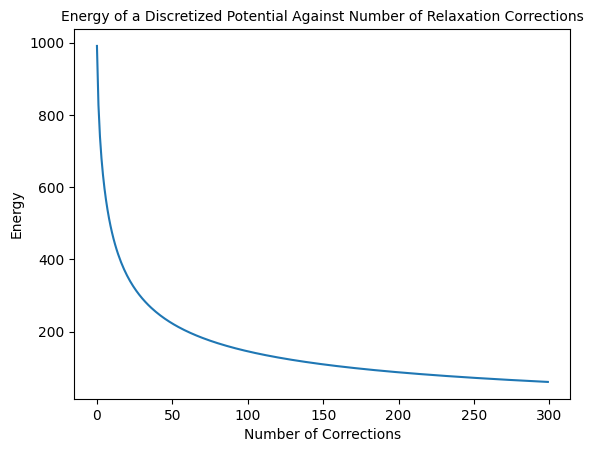

In [340]:
fig, ax = plt.subplots() # define the axes of a plot

ax.set_xlabel('Number of Corrections', fontsize=10) # set the x label
ax.set_ylabel('Energy', fontsize=10) # set the y label
ax.set_title('Energy of a Discretized Potential Against Number of Relaxation Corrections', fontsize=10) # set the title 

ax.plot(range(len(eListi)),eListi) # plot the data

We see that the energy tends to converge, as expected. Now let us plot the level sets.

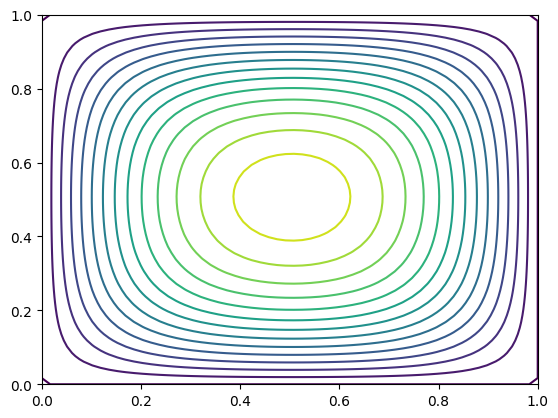

In [341]:
fig, ax = plt.subplots() # define the axes of a plot
xi = np.linspace(0,1,N)
yi = np.linspace(0,1,N)
zi = np.matrix.transpose(valsi)
levels = np.linspace(np.min(valsi),np.max(valsi),15)
ax.contour(xi,yi,zi,levels=levels)
plt.show()

For points near the circular source, the level sets are approximately circular, as is to be expected from a spherically-symmetric charge distribution. But as we look closer to the boundary of the lattice, we expect that the influence of the square boundary condition pulls the level sets into the shape of a square. And this is precisely what the code shows.

## Part (ii)

The code is precisely the same as in the previous part, of course with a different source function.

In [351]:
sourcelatii = np.zeros([N,N]) # the rectangluar source of part (ii)
for i in range(len(lattice[0])):
    for j in range(len(lattice[0])):
        sourcelatii[i][j] = source2(i/(len(lattice[0])-1),j/len((lattice[0])-1),.2,.8,.78,.82,strength)+source2(i/(len(lattice[0])-1),j/len((lattice[0])-1),.2,.8,.18,.22,-strength)

valsii = np.zeros([N,N])
for i in range(1,N-1):
    for j in range(1,N-1):
        valsii[i][j] = .5

eListii = [] # list of energies
for k in range(300):
    update(valsii,sourcelatii,.3)
    eListii.append(energy(valsii,sourcelatii))

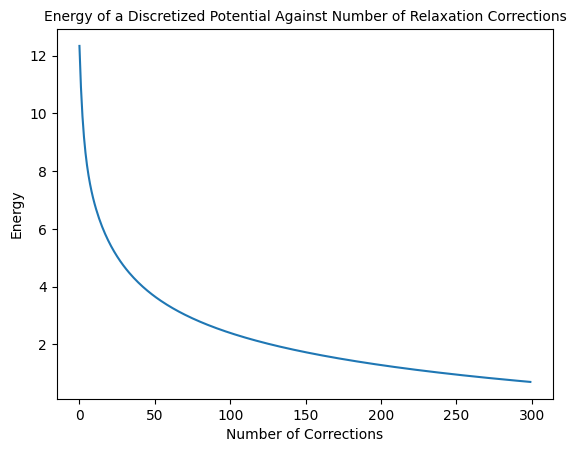

In [352]:
fig, ax = plt.subplots() # define the axes of a plot

ax.set_xlabel('Number of Corrections', fontsize=10) # set the x label
ax.set_ylabel('Energy', fontsize=10) # set the y label
ax.set_title('Energy of a Discretized Potential Against Number of Relaxation Corrections', fontsize=10) # set the title

ax.plot(range(len(eListii)),eListii) # plot the data

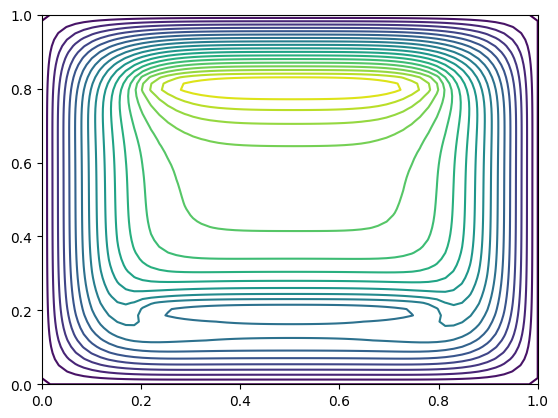

In [353]:
fig, ax = plt.subplots() # define the axes of a plot
xii = np.linspace(0,1,N)
yii = np.linspace(0,1,N)
zii = np.matrix.transpose(valsii)
levels = np.linspace(np.min(valsii),np.max(valsii),20)
ax.contour(xii,yii,zii,levels=levels)
plt.show()

We expect that, close to the source, the level sets form a set of lines parallel to the charge. This is because of the appoximate planar symmetry of the distributions. Of course, towards either end of either source, the edge effects of the field become larger and hence the level sets diverge from linearity. This is what we observe in the plot. It is maybe a little bit weird that there is not more symmetry between the top and bottom though.

## Part (iii)

In [367]:
sourcelatiii = np.zeros([N,N]) # the circular source of part (i)
for i in range(len(lattice[0])):
    for j in range(len(lattice[0])):
        sourcelatiii[i][j] = source1(i/(len(lattice[0])-1),j/len((lattice[0])-1),.5,.2,.05,-strength) + source2(i/(len(lattice[0])-1),j/len((lattice[0])-1),.2,.8,.18,.22,strength)

valsiii = np.zeros([N,N])
for i in range(1,N-1):
    for j in range(1,N-1):
        valsiii[i][j] = .5

eListiii = [] # list of energies
for k in range(300):
    update(valsiii,sourcelatiii,.7)
    eListiii.append(energy(valsiii,sourcelatiii))

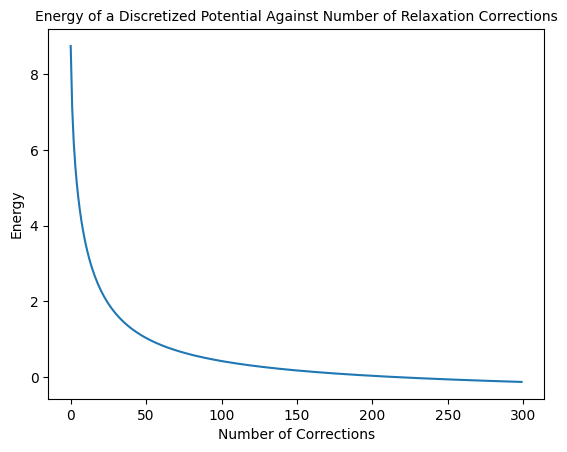

In [368]:
fig, ax = plt.subplots() # define the axes of a plot

ax.set_xlabel('Number of Corrections', fontsize=10) # set the x label
ax.set_ylabel('Energy', fontsize=10) # set the y label
ax.set_title('Energy of a Discretized Potential Against Number of Relaxation Corrections', fontsize=10) # set the title

ax.plot(range(len(eListiii)),eListiii) # plot the data

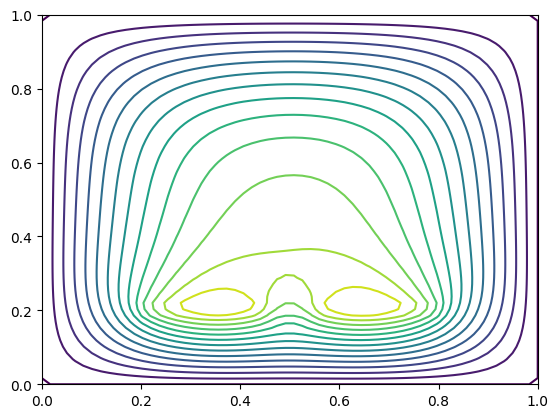

In [369]:
fig, ax = plt.subplots() # define the axes of a plot
xiii = np.linspace(0,1,N)
yiii = np.linspace(0,1,N)
ziii = np.matrix.transpose(valsiii)
levels = np.linspace(np.min(valsiii),np.max(valsiii),15)
ax.contour(xiii,yiii,ziii,levels=levels)
plt.show()

This distribution is a circular source superimposed on the center of a short, long rectagle with opposite charge. I think the plot is reasonable. By superposition, the field of the intersection of the disk with the rectangle cancels to zero, leaving two positive retangular sources on either end of the dis